Le module SciPy contient de nombreux algorithmes : 
- fft, algèbre linéaire, intégration numérique,...
- On peut voir ce module comme une extension de Numpy car il contient toutes ses fonctions.

In [93]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

In [94]:
import numpy as np
import scipy as sp
np.sqrt(-1.), np.log(-2.) 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(nan, nan)

In [95]:
sp.sqrt(-1.), sp.log(-2.) 

(1j, (0.69314718055994529+3.1415926535897931j))

In [96]:
sp.exp(sp.log(-2.))

(-2+2.4492935982947064e-16j)

## Les bibliothèques de SciPy
- `constants` : Physical and mathematical constants
- `fftpack` : Fast Fourier Transform routines
- `integrate` : Integration and ordinary differential equation solvers
- `interpolate` : Interpolation and smoothing splines
- `io` : Input and Output
- `linalg` : Linear algebra
- `signal` : Signal processing
- `sparse` : Sparse matrices and associated routines 


In [97]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 
plt.rcParams['figure.figsize'] = (10,6)
x = sp.linspace(-1, 1, num=5)  # 5 points régulièrement espacés entre -1 et 1.
y = (x-1.)*(x-0.5)*(x+0.5)     # x et y sont des tableaux numpy
f0 = interp1d(x,y, kind='zero')
f1 = interp1d(x,y, kind='linear') 
f2 = interp1d(x,y, kind='quadratic') 
f3 = interp1d(x,y, kind='cubic') 
f4 = interp1d(x,y, kind='nearest') 

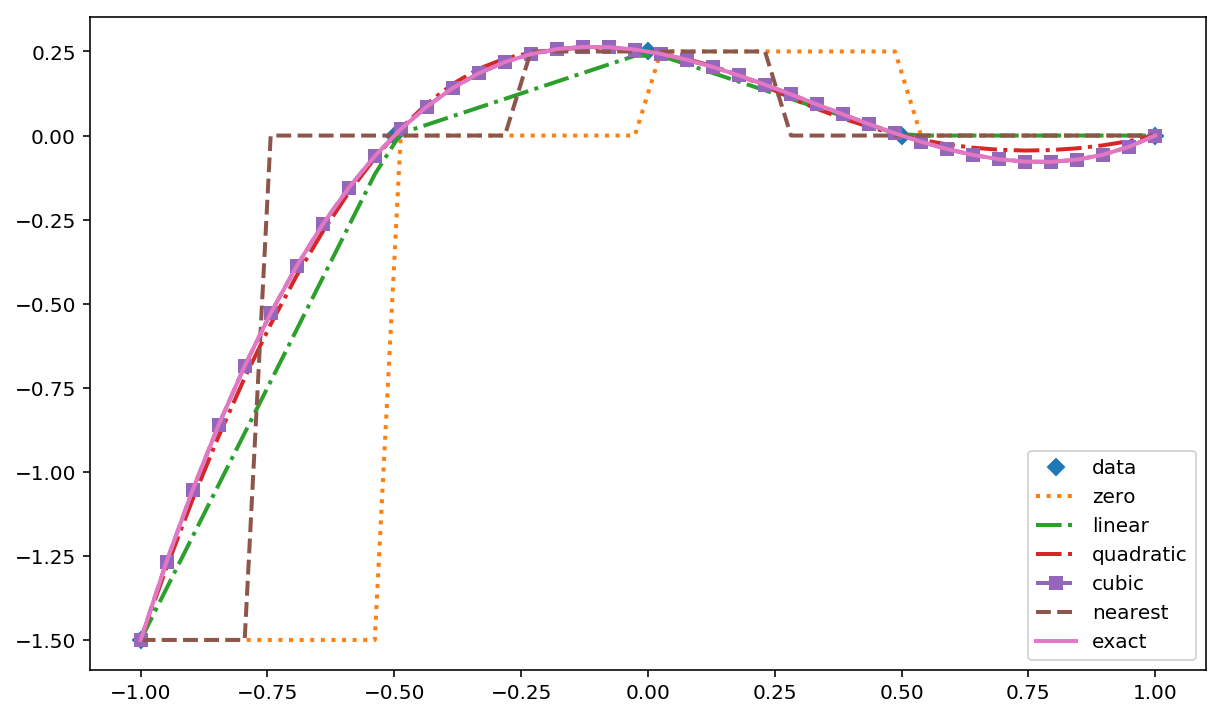

In [98]:
xnew = sp.linspace(-1, 1, num=40) 
ynew = (xnew-1.)*(xnew-0.5)*(xnew+0.5) 
plt.plot(x,y,'D',xnew,f0(xnew),':', xnew, f1(xnew),'-.',
                xnew,f2(xnew),'-.',xnew ,f3(xnew),'s--',
                xnew,f4(xnew),'--',xnew, ynew, linewidth=2)
plt.legend(['data','zero','linear','quadratic','cubic','nearest','exact'],
          loc='best');

In [99]:
from scipy.interpolate import interp2d
x,y=sp.mgrid[0:1:20j,0:1:20j]  #create the grid 20x20
z=sp.cos(4*sp.pi*x)*sp.sin(4*sp.pi*y) #initialize the field
T1=interp2d(x,y,z,kind='linear') 
T2=interp2d(x,y,z,kind='cubic') 
T3=interp2d(x,y,z,kind='quintic') 


Text(0.5,1,'100x100 quintic')

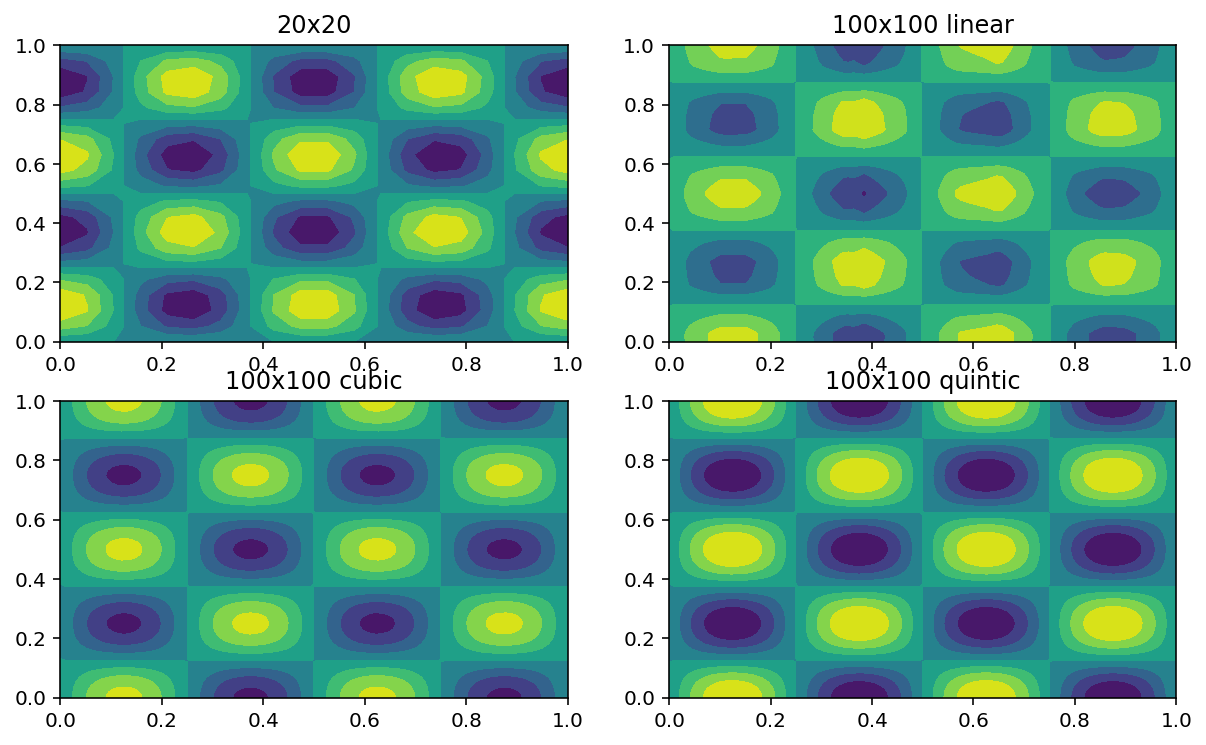

In [100]:
X,Y=sp.mgrid[0:1:100j,0:1:100j] #create the interpolation grid 100x100
plt.figure(1) 
plt.subplot(221) #Plot original data
plt.contourf(x,y,z) 
plt.title('20x20') 
plt.subplot(222) #Plot linear interpolation
plt.contourf(X,Y,T1(X[:,0],Y[0,:])) 
plt.title('100x100 linear') 
plt.subplot(223) #Plot cubic interpolation
plt.contourf(X,Y,T2(X[:,0],Y[0,:])) 
plt.title('100x100 cubic')
plt.subplot(224) #Plot quintic interpolation
plt.contourf(X,Y,T3(X[:,0],Y[0,:])) 
plt.title('100x100 quintic') 

## Transformées de Fourier : scipy.fftpack
Algorithmes de Transformées de Fourier rapides (FFT) en dimension 1, 2 et n (une exponentielle complexe pour noyau et des coefficients complexes) : fft, ifft (inverse), rfft (pour un vecteur de réels), irfft, fft2 (dimension 2), ifft2, fftn (dimension n), ifftn.
- Transformées en cosinus discrètes de types I, II et III (un cosinus pour noyau et des coefficients réels) : dct
- Produit de convolution : convolve


In [101]:
from numpy.fft import fft, ifft
x = np.random.random(1024)
%timeit ifft(fft(x))

62.9 µs ± 1e+03 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [102]:
from scipy.fftpack import fft, ifft
x = np.random.random(1024)
%timeit ifft(fft(x))

25 µs ± 457 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Algèbre linéaire: scipy.linalg
- Solveurs linéaires, décompositions, valeurs propres. ( fonctions communes avec numpy).
- Des fonctions de matrices : expm, sinm, sinhm,...  
- Matrices par blocs diagonales, triangulaires, circulantes,...




In [103]:
import scipy as sp
import scipy.linalg as spl 
b=sp.ones(5)
A=sp.array([[1.,3.,0., 0.,0.],
           [ 2.,1.,-4, 0.,0.],
           [ 6.,1., 2,-3.,0.], 
           [ 0.,1., 4.,-2.,-3.], 
           [ 0.,0., 6.,-3., 2.]])
print("x=",spl.solve(A,b,sym_pos=False)) # LAPACK ( gesv ou posv si matrice sym)
AB=sp.array([[0.,3.,-4.,-3.,-3.],
             [1.,1., 2.,-2., 2.],
             [2.,1., 4.,-3., 0.],
             [6.,1., 6., 0., 0.]])
print("x=",spl.solve_banded((2,1),AB,b)) # LAPACK ( gbsv )


x= [-0.241  0.414 -0.267 -0.855  0.019]
x= [-0.241  0.414 -0.267 -0.855  0.019]


In [105]:
P,L,U = spl.lu(A) #  P A = L U
np.set_printoptions(precision=3)
for M in (P,L,U):
    print(M, end="\n"+20*"-"+"\n")

[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.]]
--------------------
[[ 1.     0.     0.     0.     0.   ]
 [ 0.167  1.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.   ]
 [ 0.333  0.235 -0.765  1.     0.   ]
 [ 0.     0.353  0.686  0.083  1.   ]]
--------------------
[[ 6.     1.     2.    -3.     0.   ]
 [ 0.     2.833 -0.333  0.5    0.   ]
 [ 0.     0.     6.    -3.     2.   ]
 [ 0.     0.     0.    -1.412  1.529]
 [ 0.     0.     0.     0.    -4.5  ]]
--------------------


## Stockage CSC (Compressed Sparse Column) des matrices creuses

- Les opérations matricielles sont optimisées 
- Le "slicing" suivant les colonnes est efficace.
- produit matrice vecteur efficace.
- La conversion dans d'autres formats peut être coûteuse.



In [106]:
import scipy.sparse as spsp
row = sp.array([0,2,2,0,1,2]) 
col = sp.array([0,0,1,2,2,2])
data  = sp.array([1,2,3,4,5,6]) 
Mcsc1 = spsp.csc_matrix((data,(row,col)),shape=(3,3)) 
Mcsc1.todense()

matrix([[1, 0, 4],
        [0, 0, 5],
        [2, 3, 6]], dtype=int64)

In [107]:
indptr  = sp.array([0,2,3,6]) 
indices = sp.array([0,2,2,0,1,2]) 
data    = sp.array([1,2,3,4,5,6]) 
Mcsc2 = spsp.csc_matrix ((data,indices,indptr),shape=(3,3))
Mcsc2.todense()

matrix([[1, 0, 4],
        [0, 0, 5],
        [2, 3, 6]])

## Les formats  dédiés à l'assemblage
- `lil_matrix` : Row-based linked list matrix. Format agréable pour l'assemblage mais il faut convertir dans un autre format avant de calculer.
- `dok_matrix` : A dictionary of keys based matrix. Format idéal pour un assemblage incrémental et la conversion vers un autre format est efficace.
- `coo_matrix`  : coordinate list format. Conversion tres rapide vers les formats CSC/CSR.

[Lien vers la documentation scipy](http://docs.scipy.org/doc/scipy/reference/sparse.html)

## Matrices creuses : scipy.sparse.linalg

- speigen, speigen_symmetric, lobpcg pour le calcul de valeurs et vecteurs propres (ARPACK).
- svd pour une décomposition en valeurs singulières (ARPACK).
- Méthodes directes (UMFPACK si présent ou SUPERLU) ou itératives 
- spsolve pour les débutants.
- dsolve ou isolve pour le niveau intermédiaire.
- En niveau avancée: splu, spilu (méthodes directes); cg, cgs, bicg, bicgstab, gmres, lgmres et qmr (méthodes itératives)

- Pour les pros, petsc4py et slepc4py.
- Algorithmes de minimisation : lsqr et minres

## LinearOperator

Pour certaines méthodes itératives telles que cg, gmres, il suffit de connaitre le produit matrice vecteur. La classe LinearOperator permet d'utiliser ces méthodes.


In [141]:
import scipy.sparse.linalg as spspl
def mv(v):
   return sp.array([2*v[0],3*v[1]])

A=spspl.LinearOperator((2 ,2),matvec=mv,dtype=float )
A

<2x2 _CustomLinearOperator with dtype=float64>

In [142]:
A*sp.ones(2)

array([ 2.,  3.])

In [143]:
A.matmat(sp.array([[1,-2],[3,6]]))

array([[ 2, -4],
       [ 9, 18]])

## Factorisation LU

In [112]:
N = 50
un = sp.ones(N)
w = sp.rand(N+1)
A = spsp.spdiags([w[1:],-2*un,w[:-1]],[-1,0,1],N,N) # tridiagonal matrix
A = A.tocsc()
b = un
op = spspl.splu(A)
op

In [113]:
x=op.solve(b)
spl.norm(A*x-b)

1.631687946612622e-15

## Gradient conjugué

In [114]:
global k
k=0
def f(xk): # function called at every iterations
     global k
     print ("iteration {0:2d} residu = {1:7.3g}".format(k,spl.norm(A*xk-b)))
     k += 1

x,info=spspl.cg(A,b,x0=sp.zeros(N),tol=1.0e-12,maxiter=N,M=None,callback=f)

iteration  0 residu =    2.86
iteration  1 residu =    1.08
iteration  2 residu =   0.574
iteration  3 residu =   0.214
iteration  4 residu =   0.102
iteration  5 residu =  0.0427
iteration  6 residu =   0.017
iteration  7 residu = 0.00807
iteration  8 residu = 0.00332
iteration  9 residu = 0.00111
iteration 10 residu = 0.000456
iteration 11 residu = 0.000219
iteration 12 residu = 7.34e-05
iteration 13 residu = 2.84e-05
iteration 14 residu = 1.14e-05
iteration 15 residu = 3.78e-06
iteration 16 residu = 1.45e-06
iteration 17 residu = 4.69e-07
iteration 18 residu = 1.98e-07
iteration 19 residu = 5.69e-08
iteration 20 residu =   2e-08
iteration 21 residu = 6.67e-09
iteration 22 residu = 1.56e-09
iteration 23 residu = 4.41e-10
iteration 24 residu = 1.66e-10
iteration 25 residu = 5.64e-11
iteration 26 residu = 1.34e-11
iteration 27 residu = 4.35e-12


## Gradient conjugué avec préconditionneur

In [83]:
pc=spspl.spilu(A,drop_tol=0.1)  # pc is an ILU decomposition
xp=pc.solve(b)
spl.norm(A*xp-b)

0.35925633760654097

In [84]:
def mv(v):
    return pc.solve(v)
lo = spspl.LinearOperator((N,N),matvec=mv)
k = 0
x,info=spspl.cg(A,b,x0=sp.zeros(N),tol=1.e-12,maxiter=N,M=lo,callback=f)

iteration  0 residu =   0.334
iteration  1 residu =  0.0195
iteration  2 residu = 0.00111
iteration  3 residu = 3.87e-05
iteration  4 residu = 2.3e-06
iteration  5 residu = 6.62e-08
iteration  6 residu = 4.48e-09
iteration  7 residu = 3.03e-10
iteration  8 residu = 1.94e-11
iteration  9 residu = 1.72e-12


## Intégration 

- quad, dblquad, tplquad,... La librairie Fortran utilisée est QUADPACK.


In [86]:
import scipy.integrate as spi

x2=lambda x: x**2
4.**3/3  # int(x2) in [0,4]

21.333333333333332

In [87]:
spi.quad(x2,0.,4.)

(21.333333333333336, 2.368475785867001e-13)

## Scipy ODE solver

It uses the Fortran ODEPACK library. 

### Van der Pol Oscillator
$$
\begin{eqnarray}
y_1'(t)	& = & y_2(t), \nonumber \\
y_2'(t)	& = & 1000(1 - y_1^2(t))y_2(t) - y_1(t) \nonumber
\end{eqnarray}
$$
with $y_1(0) = 2 $ and $ y_2(0) = 0. $.

In [117]:
import numpy as np
import scipy.integrate as spi

def vdp1000(y,t):
     dy=np.zeros(2)
     dy[0]=y[1]
     dy[1]=1000.*(1.-y[0]**2)*y[1]-y[0]
     return dy 

In [118]:
t0, tf =0,  3000
N = 300000
t, dt = np.linspace(t0,tf,N, retstep=True)

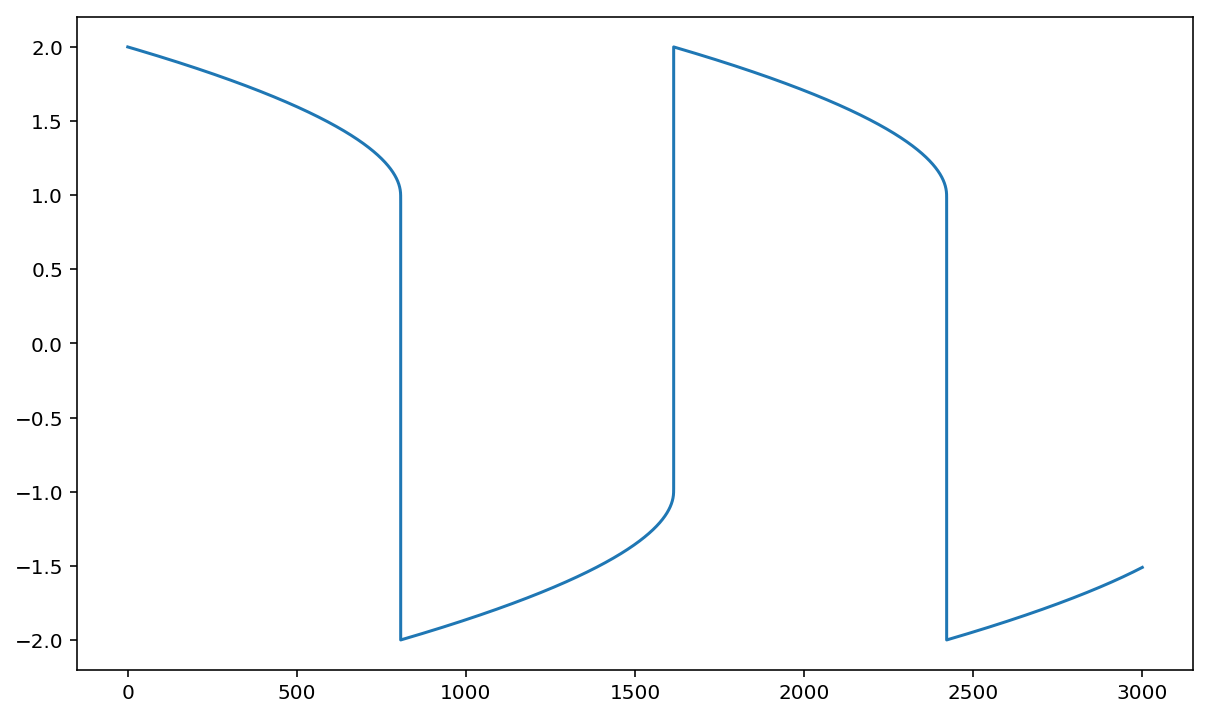

In [120]:
y=spi.odeint(vdp1000,[2.,0.],t)
plt.plot(t,y[:,0]);

## Descriptive statistics

In [122]:
import scipy.stats as stat 

d = np.array([0.553,0.57,0.576,0.601,0.606,0.606,0.609,0.611,0.615,0.628,0.654,0.662,0.668,0.67,0.672,0.69,0.693,0.749])
stat_des = stat.describe(d)
stat_des

DescribeResult(nobs=18, minmax=(0.55300000000000005, 0.749), mean=0.63516666666666666, variance=0.0025368529411764714, skewness=0.38763289979752136, kurtosis=-0.3587369048751916)

In [124]:
stat_des[0]    #Use index to access to the first property

18


In [125]:
stat_des.nobs #Use name

18

In [128]:
n,mm,m,v,sk,kt = stat.describe(d) # multiple assignment
stat.percentileofscore(d,0.6215) # 50.0, the half of the examples has a value lower than 0.6215

50.0

## Quantiles and cumulative distribution functions of some distributions
Get the values of quantiles and cumulative distribution functions for various statistical distributions frequently used for statistical inference.

In [131]:
stat.norm.ppf(0.95,loc=0,scale=1), stat.norm.cdf(1.96,loc=0,scale=1) # standard normal distribution

1.6448536269514722

In [133]:
stat.t.ppf(0.95,df=30), stat.t.cdf(1.96,df=30) # Student distribution Ð degree of freedom = 30

1.6972608943617378

In [138]:
stat.chi.ppf(0.95,df=10) # chi-squared distribution - df = 10

4.2786724638928773

In [139]:
stat.f.ppf(0.95,dfn=1,dfd=30), stat.f.cdf(3.48,dfn=1,dfd=30) # Fisher-Snedecor , numerator=1, denominator=30

(4.1708767857666906, 0.92807866146519213)